![Growdev](https://www.growdev.com.br/assets/images/logo_growdev.png)

![Formação Engenharia de Dados](https://d335luupugsy2.cloudfront.net/cms/files/524558/1707226566/$occu5m8t1op)

Este material tem como objetivo incentivar a prática dos conteúdos estudados até o momento, e a pesquisa. Tenha em consideração que o exercício foi pensado para incentivar a prática dos conteúdos estudados até então, porém aprender a pesquisar faz parte do processo de aprendizagem.

Fique tranquilo, faça os exercícios com calma, e boa prática!


# Orientações:

 - Faça uma copia deste arquivo
 - Após concluir os exercicios, suba seu exercicio para o GitHub e compartilhe o link no **google** Classroom


# Exercícios pandas e plot

As questões a seguir utilizam como base o dataset de venda de jogos eletrônicos disponível no seguinte [link.](https://www.kaggle.com/code/rafa84miranda/vendas-de-jogos-de-videogames/data?select=vgsales.csv)

Os campos são:
- Rank: posição no ranking de vendas
- Name: nome do jogo
- Platform: plataforma/console
- Year: ano de lançamento
- Genre: gênero
- Publisher: empresa que publicou o jogo
- NA_Sales: vendas na américa do norte (em milhões de dólares)
- EU_Sales: vendas na europa (em milhões de dólares)
- JP_Sales: vendas no japão (em milhões de dólares)
- Other_Sales: outras vendas (em milhões de dólares)
- Global_Sales: vendas globais (em milhões de dólares)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('vgsales.csv')
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [4]:
df['Name'].unique().shape

(11358,)

Qual foi o jogo mais vendido no mundo em 2010?



In [5]:
mais_vendido_2010 = df[[ 'Name', 'Year', 'Global_Sales']]
mais_vendido_2010 = mais_vendido_2010[mais_vendido_2010['Year'].isin([2010])]
mais_vendido_2010.head(3)

,Name,Year,Global_Sales
11183,Kinect Adventures!,2010,21.82
11184,Pokemon Black/Pokemon White,2010,15.32
11185,Call of Duty: Black Ops,2010,14.64


In [6]:
indice_max = mais_vendido_2010['Global_Sales'].idxmax() #11183
mais_vendido_2010.loc[indice_max]

Name            Kinect Adventures!
Year                          2010
Global_Sales                 21.82
Name: 11183, dtype: object

Qual foi a empresa que mais vendeu de 2005 até 2016 - Construa um gráfico de barras para apresentar


In [7]:
df_filtro_ano = df[(df['Year'] >= 2005) & (df['Year'] <= 2016)]
df_filtro_ano.sample(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6621,10252,Pimp My Ride,X360,2006,Racing,Activision,0.1,0.01,0.0,0.01,0.11
7017,15471,Tycoon City: New York,PC,2006,Strategy,Atari,0.0,0.02,0.0,0.00,0.02
9621,15310,The Lord of the Rings Online: Mines of Moria,PC,2008,Role-Playing,Codemasters Online,0.0,0.02,0.0,0.00,0.02


In [8]:
vendas_por_empresa = pd.DataFrame(df_filtro_ano.groupby('Publisher')['Global_Sales'].sum())
# vendas_por_empresa

empresa_que_mais_vendeu = vendas_por_empresa.idxmax()
max_vendas = vendas_por_empresa.max()

print(f"A empresa que mais vendeu de 2005 a 2016 foi: {empresa_que_mais_vendeu} com {max_vendas} vendas.")

A empresa que mais vendeu de 2005 a 2016 foi: Global_Sales    Nintendo
dtype: object com Global_Sales    958.43
dtype: float64 vendas.


<Figure size 2000x1000 with 0 Axes>

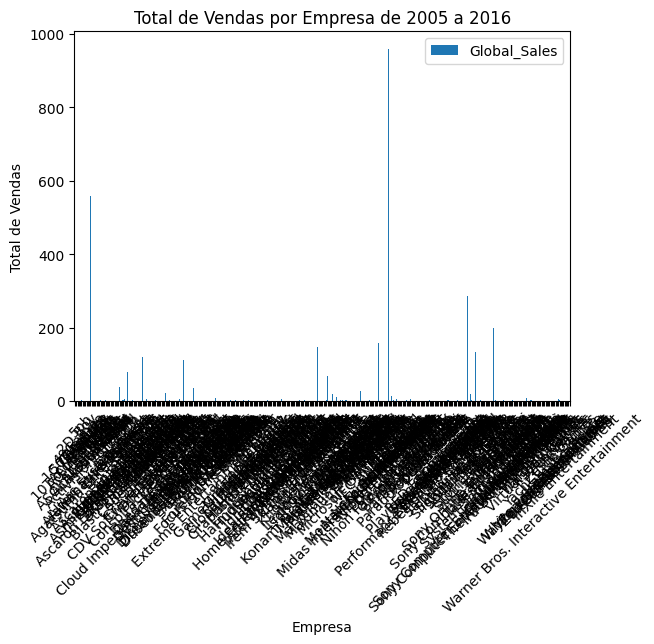

In [9]:
# Plotando o gráfico de barras
plt.figure(figsize=(20, 10))
vendas_por_empresa.plot(kind='bar')
plt.title('Total de Vendas por Empresa de 2005 a 2016')
plt.xlabel('Empresa')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()

# Lembrete: melhorar gráfico

Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports.


In [10]:
menos_vendido_2008 = df[[ 'Name', 'Year', 'Genre','Global_Sales']]

menos_vendido_2008 = menos_vendido_2008[menos_vendido_2008['Genre'].isin(['Sports'])]

menos_vendido_2008 = menos_vendido_2008[menos_vendido_2008['Year'].isin([2008])]
# menos_vendido_2008.sample(3)

indice_min = menos_vendido_2008['Global_Sales'].idxmin() 
menos_vendido_2008.loc[indice_min]


Name            Winning Post 7 Maximum 2008
Year                                   2008
Genre                                Sports
Global_Sales                           0.01
Name: 9691, dtype: object

Qual o percentual relacionado às vendas globais de jogos de Wii (excluindo-se América do norte, japão e europa) de 2006 até 2010?





In [11]:
df.sample()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5017,12215,Fallout: Brotherhood of Steel,PS2,2004,Role-Playing,Avalon Interactive,0.03,0.03,0.0,0.01,0.07


**Passos**

1. df com o intervalo de anos
2. df com total 'Other_Sales' da 'Platform' Wii
3. df com o total 'Other_Sales'
4. conta do percentual: (venda_wii/vendas_total)*100

In [12]:
df_other_sales = df[(df['Year'] >= 2006) & (df['Year'] <= 2010)]

In [13]:
df_other_sales.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6112,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
6113,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
6114,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [14]:
df_other_sales = df_other_sales[['Platform', 'Year','Other_Sales']]
# df_other_sales.head(3)

wii = ['Wii']
df_wii = df_other_sales[df_other_sales['Platform'].isin(wii)]
df_wii.head(3)


,Platform,Year,Other_Sales
6112,Wii,2006,8.46
6114,Wii,2006,2.85
6116,Wii,2006,0.70


In [15]:
vendas_wii = df_wii['Other_Sales'].sum()
total_vendas = df_other_sales['Other_Sales'].sum()

percentagem = (vendas_wii/total_vendas)*100

print(f'O percentual relacionado às vendas globais de jogos de Wii (excluindo América do norte, japão e europa) de 2006 até 2010, é de {percentagem:.2f}%')

O percentual relacionado às vendas globais de jogos de Wii (excluindo América do norte, japão e europa) de 2006 até 2010, é de 20.28%


Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.


In [16]:
df['Platform'].unique()

array(['2600', 'NES', 'PC', 'DS', 'GB', 'SNES', 'GEN', 'GG', 'SCD', 'NG',
       'PS', 'SAT', '3DO', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'PS2', 'XB',
       'GBA', 'GC', 'PSP', 'X360', 'Wii', 'PS3', '3DS', 'PSV', 'WiiU',
       'PS4', 'XOne'], dtype=object)

In [17]:
console = pd.DataFrame(df.groupby(['Year','Platform'])['Global_Sales'].sum())
console.head(10)

Global_Sales
Year Platform              
1980 2600             11.38
1981 2600             35.77
1982 2600             28.86
1983 2600              5.83
     NES              10.96
1984 2600              0.27
     NES              50.09
1985 2600              0.45
     DS                0.02
     NES              53.44

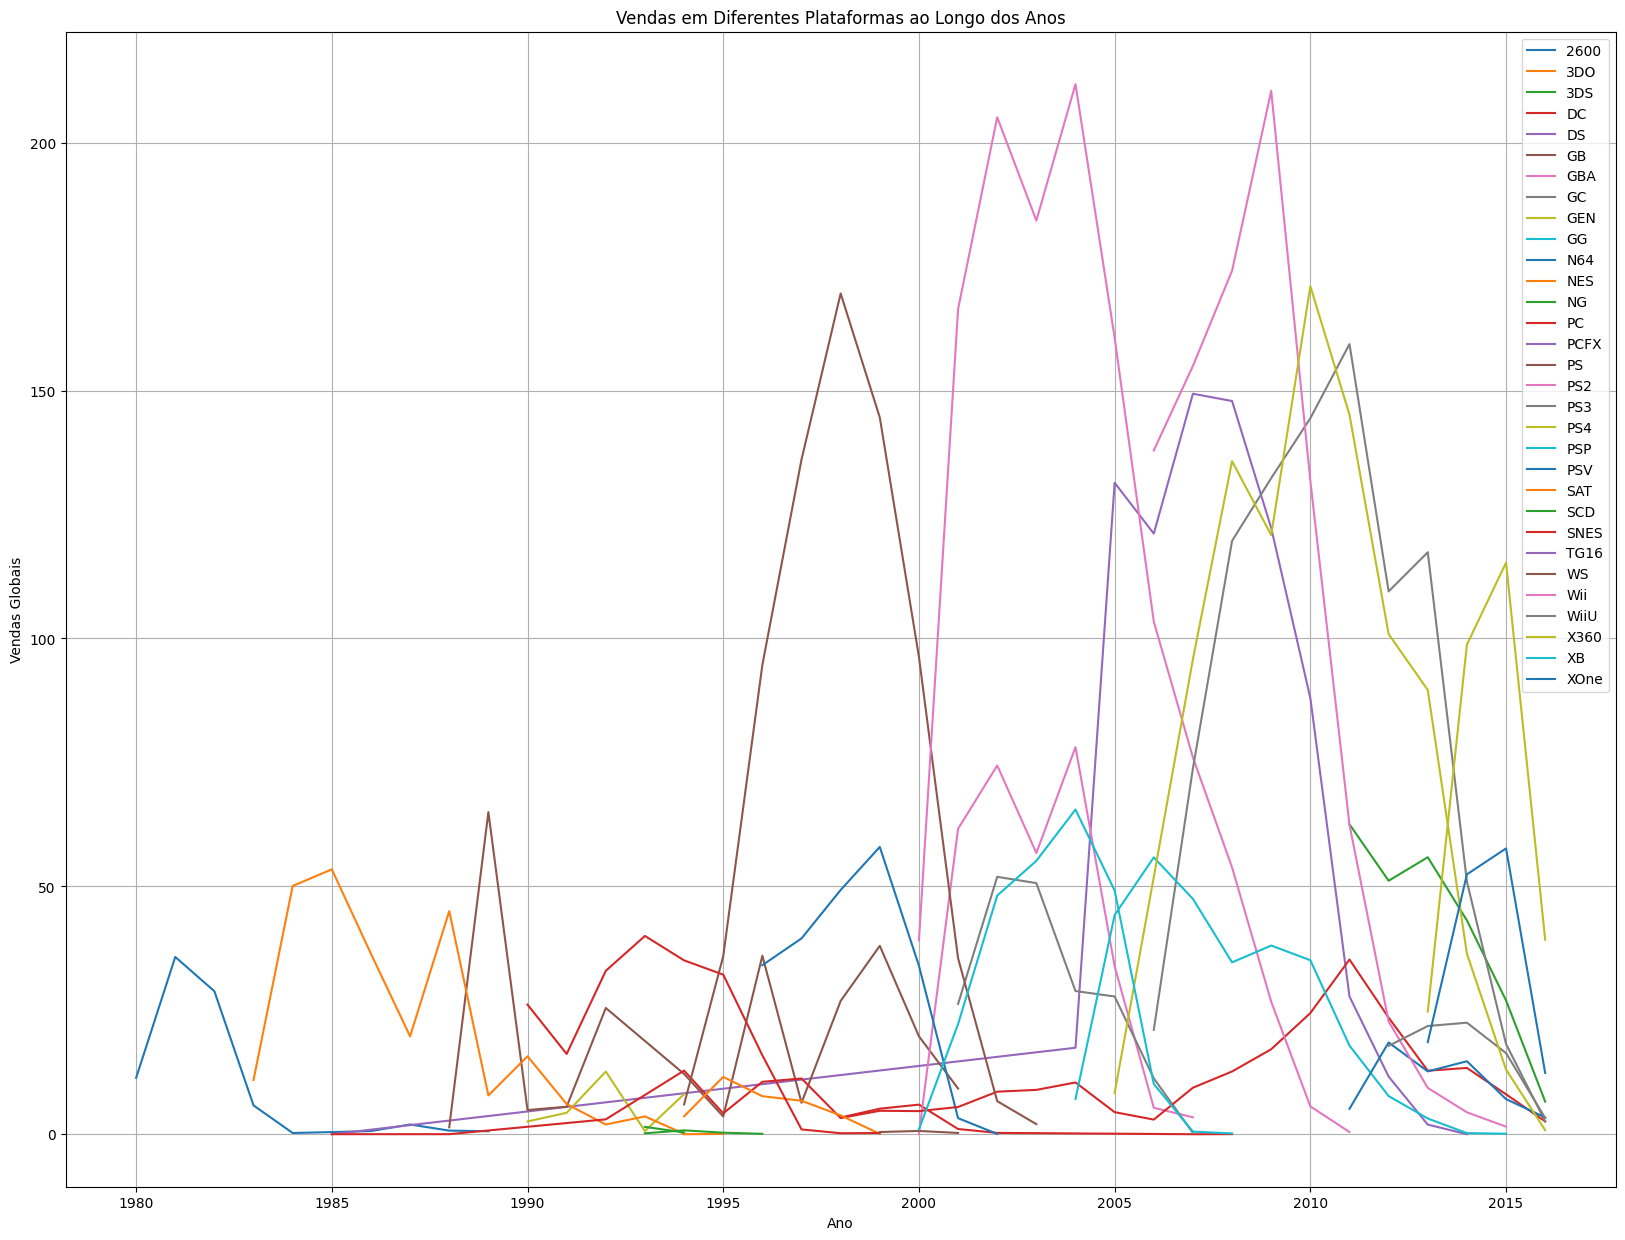

In [18]:
console = console.reset_index() #assim consegui ressetar o index e acessar os dados como coluna.

plt.figure(figsize=(20, 15))

for platform, data in console.groupby('Platform'):
    plt.plot(data['Year'], data['Global_Sales'], label = platform)

plt.xlabel('Ano')
plt.ylabel('Vendas Globais')
plt.title('Vendas em Diferentes Plataformas ao Longo dos Anos')
plt.legend()
plt.grid(True)
plt.show()

Mostre um gráfico de pizza com o percentual de vendas dos diferentes gêneros de jogos.




In [19]:
df['Genre'].unique()

array(['Shooter', 'Misc', 'Fighting', 'Sports', 'Action', 'Platform',
       'Puzzle', 'Racing', 'Simulation', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

In [20]:
generos = pd.DataFrame(df.groupby('Genre')['Global_Sales'].sum())
generos = generos.reset_index()
generos

,Genre,Global_Sales
0,Action,1722.87
1,Adventure,234.80
2,Fighting,444.05
3,Misc,797.62
4,Platform,829.15
5,Puzzle,242.22
6,Racing,726.77
7,Role-Playing,923.80
8,Shooter,1026.20
9,Simulation,390.16


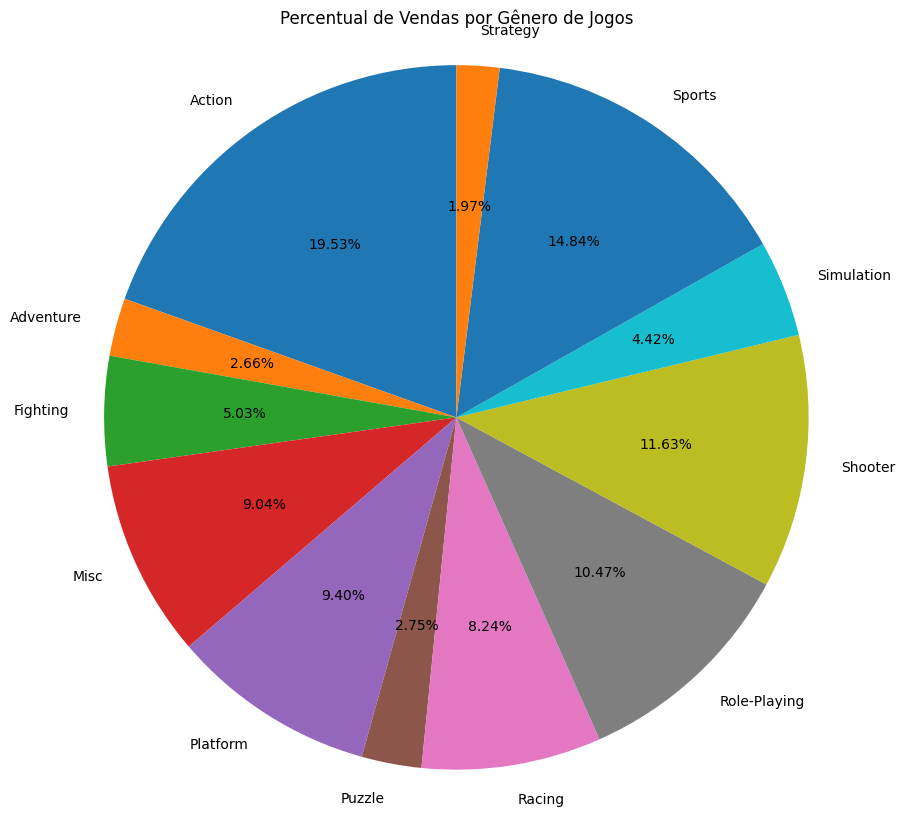

In [25]:
plt.figure(figsize=(10,10))

plt.pie(generos["Global_Sales"],labels = generos["Genre"],autopct = '%1.2f%%',startangle = 90)
plt.title("Percentual de Vendas por Gênero de Jogos")
plt.axis('equal')  # aspecto de círculo


plt.show()

# Exercícios_pandas

Utilize os arquivos [livros.csv](https://drive.google.com/file/d/1fzuUyFxhzhE9U4_-i3IIUTwvgr3QG1Hj/view?usp=sharing), [livros_genero.csv](https://drive.google.com/file/d/1Cww5lAb7l_LQXVhH1ieyIOWIrqorNKcn/view?usp=sharing) e [livros_classicos.csv](https://drive.google.com/file/d/1pbSReiGSIIlHHXbFBOAaA5zTlNTrbY9P/view?usp=sharing) como entrada para o processamento requerido nos seguintes exercícios.


In [29]:
livros = pd.read_csv('livros.csv')
livros_genero = pd.read_csv('livros_genero.csv')
livros_classicos = pd.read_csv('livros_classicos.csv')

In [87]:
livros

,nome,paginas
0,livro 1,257
1,livro 2,106
2,livro 3,150
3,livro 4,175
4,livro 5,321
5,livro 6,159
6,livro 7,980
7,livro 8,235
8,livro 9,745
9,livro 10,126


In [34]:
livros_genero.head(3)

,genero,autor
0,Drama,Pedro
1,Aventura,José
2,Drama,Carlos


In [88]:
livros_classicos

,nome,autor
0,livro 1,Jorge
1,livro 2,Santos
2,livro 3,Leandro
3,livro 4,Clara
4,livro 5,Flavia
5,livro 6,Leandro
6,livro 7,Santos
7,livro 8,Marcia
8,livro 9,Marcia
9,livro 10,Clara


Faça a concatenação das bases de dados livros.csv e livros_genero.csv e encontre qual o gênero de livro correspondente a cada livro.

In [38]:
df_concat = pd.concat([livros,livros_genero], axis=1)
df_concat.head(3)

,nome,paginas,genero,autor
0,livro 1,257.0,Drama,Pedro
1,livro 2,106.0,Aventura,José
2,livro 3,150.0,Drama,Carlos


Faça a concatenação das bases de dados de livros e livros_genero e encontre qual os gêneros e os autores que não possuem um livro correspondente.

In [45]:
df_concat[df_concat['nome'].isna()]

,nome,paginas,genero,autor
10,NaN,NaN,Romance,Pedro


Faça a junção das bases de livros e livros clássicos.

In [84]:
df_classicos = livros.merge(livros_classicos, on = 'nome')
df_classicos

,nome,paginas,autor
0,livro 1,257,Jorge
1,livro 2,106,Santos
2,livro 3,150,Leandro
3,livro 4,175,Clara
4,livro 5,321,Flavia
5,livro 6,159,Leandro
6,livro 7,980,Santos
7,livro 8,235,Marcia
8,livro 9,745,Marcia
9,livro 10,126,Clara


Faça a junção das bases de livros e livros clássicos apenas com os elementos em comum entre ambos e remova os índices dos antigos dataframes.

Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos.

Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos, além de nomes para os índices.

Faça a junção das bases de dados livros e livros_classicos e verifique a integridade do dataframe resultante.

In [90]:
df_classicos.isna()

,nome,paginas,autor
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False
